In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from plot_functions import *
from sklearn.model_selection import KFold

In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

region = "SanDiego"
year = 2014

import os


def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
n_splits = 10
import sys
case=2
a=2
cost='abs'

In [4]:
def get_tensor_appliances(df, dfc, appliances):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in appliances]).flatten()
    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), len(appliances), stop - start))
    M, N, O = tensor.shape
    return tensor

In [5]:
all_comb = [[x] for x in APPLIANCES_ORDER]
all_comb.extend([['aggregate','fridge']])
all_comb.extend([['aggregate', 'hvac']])
all_comb.extend([APPLIANCES_ORDER])
all_comb

[['aggregate'],
 ['hvac'],
 ['fridge'],
 ['mw'],
 ['dw'],
 ['wm'],
 ['oven'],
 ['aggregate', 'fridge'],
 ['aggregate', 'hvac'],
 ['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven']]

In [6]:
from copy import deepcopy


df, dfc = create_matrix_single_region("SanDiego", year)
out = {}
for num_season in range(1, 3):
    out[num_season] = {}
    for appliance_comb in all_comb:
        print(appliance_comb, num_season)
        tensor = get_tensor_appliances(df, dfc, appliance_comb)
        H, A, T = learn_HAT(case, tensor, 2, num_season, num_iter=4000, lr=0.1, dis=False, cost_function=cost)
        T = T/T.flatten().max()
        out[num_season]["+".join(appliance_comb)] = {'H':H, 'A':A, 'T':T}


(['aggregate'], 1)
(['hvac'], 1)
(['fridge'], 1)
(['mw'], 1)
(['dw'], 1)
(['wm'], 1)
(['oven'], 1)
(['aggregate', 'fridge'], 1)
(['aggregate', 'hvac'], 1)
(['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven'], 1)
(['aggregate'], 2)
(['hvac'], 2)
(['fridge'], 2)
(['mw'], 2)
(['dw'], 2)
(['wm'], 2)
(['oven'], 2)
(['aggregate', 'fridge'], 2)
(['aggregate', 'hvac'], 2)
(['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven'], 2)


(0, ['aggregate'])
(1, ['hvac'])
(2, ['fridge'])
(3, ['mw'])
(4, ['dw'])
(5, ['wm'])
(6, ['oven'])
(7, ['aggregate', 'fridge'])
(8, ['aggregate', 'hvac'])
(9, ['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven'])
(0, ['aggregate'])
(1, ['hvac'])
(2, ['fridge'])
(3, ['mw'])
(4, ['dw'])
(5, ['wm'])
(6, ['oven'])
(7, ['aggregate', 'fridge'])
(8, ['aggregate', 'hvac'])
(9, ['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven'])


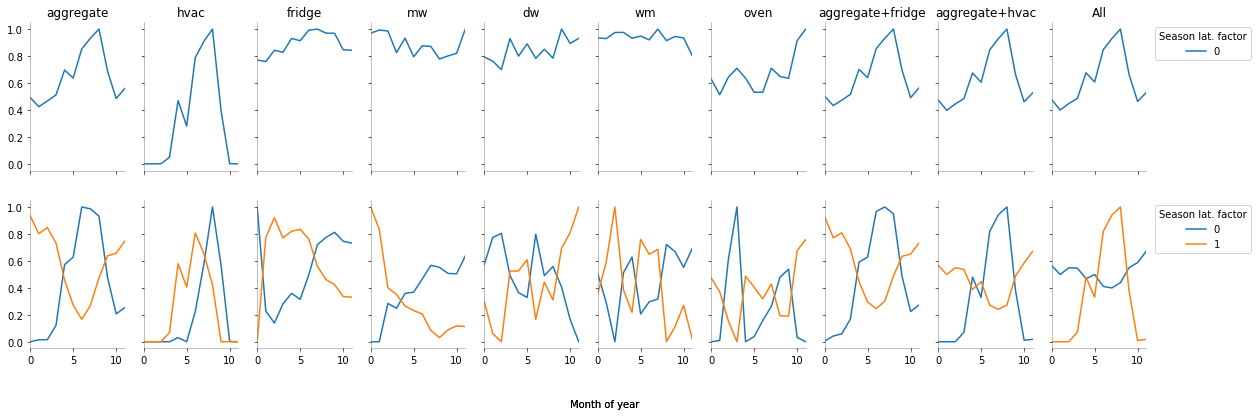

In [7]:
fig, ax = plt.subplots(ncols=10, nrows=2, figsize=(20, 6), sharey=True, sharex=True)
for row, num_season in enumerate(range(1, 3)):
    for column, appliance_comb in enumerate(all_comb):
        print(column, appliance_comb)
        pd.DataFrame(out[num_season]["+".join(appliance_comb)]['T']).plot(ax=ax[row, column], legend=False)
        if len(appliance_comb)>5:
            ax[0, column].set_title("All")
        else:
            ax[0, column].set_title("+".join(appliance_comb))
        format_axes(ax[row, column])
    fig.text(0.5, -0.01, "Month of year")
    ax[row, 9].legend(bbox_to_anchor=(1.04,1), loc="upper left", title='Season lat. factor')

In [16]:

for month in range(1, 13):
    df['agg-hvac_%d' %month] = df['aggregate_%d' %month]-df['hvac_%d' %month]

In [27]:
month = 8
len(df['agg-hvac_%d' %month].dropna()), len(df['hvac_%d' %month].dropna())

(33, 33)

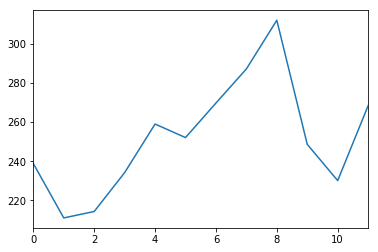

In [74]:
(pd.Series(mean_agg)-pd.DataFrame(w).sum(axis=1)).plot()

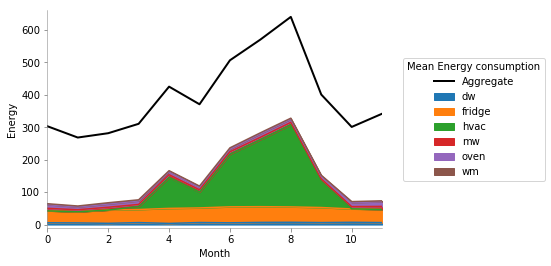

In [67]:
w = {}
for appliance in APPLIANCES_ORDER[1:]:
    w[appliance] = [df['%s_%d' %(appliance, month)].mean() for month in range(1, 13)]
mean_d = [df['agg-hvac_%d' %month].mean() for month in range(1, 13)]


ax = pd.DataFrame(w).plot(kind='area')
pd.Series(mean_agg).plot(ax=ax, label='Aggregate', color='k', linewidth=2)
plt.legend(title='Mean Energy consumption', bbox_to_anchor=[1.5, 0.5], loc='right')
plt.ylim((-10, 660))
plt.xlabel("Month")
plt.ylabel("Energy")
format_axes(plt.gca())

In [ ]:
We can see that the season factors are different across different appliances except aggregate and HVAC. The HVAC shows two distinct seasonal patterns. The corresponding appliance factor is [[12, 0], [0, 12]]

In [76]:
a = pd.DataFrame(out[5]['fridge']['H'])
a['area'] = df['area'].values
a['num_occupants'] = df.total_occupants.values
a['num_rooms'] = df.num_rooms.values

a.corr()

,0,1,area,num_occupants,num_rooms
0,1.000000,-0.237881,0.061971,-0.293939,0.240687
1,-0.237881,1.000000,0.235204,0.619693,0.024198
area,0.061971,0.235204,1.000000,-0.599417,0.925098
num_occupants,-0.293939,0.619693,-0.599417,1.000000,-0.557386
num_rooms,0.240687,0.024198,0.925098,-0.557386,1.000000


In [12]:
from sklearn.model_selection import train_test_split, KFold

In [13]:
n_splits = 10


In [14]:
from common import compute_rmse

In [27]:
np.arange(0.1, 1.0, 0.1)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [16]:
H_au, A_au, T_au = learn_HAT(case, au_tensor, 2, 3, num_iter=2000, lr=0.1, dis=False, cost_function=cost)
H, A, T = learn_HAT(case, tensor, 2, 3, num_iter=2000, lr=0.1, dis=False, cost_function=cost, A_known=A_au)
H_n, A_n, T_n = learn_HAT(case, tensor, 2, 3, num_iter=2000, lr=0.1, dis=False, cost_function=cost)

H_se, A_se, T_se ={}, {}, {}
for constant in [0.1, 1, 10]:
    h, A_c, t = learn_HAT(case, au_tensor, 2, 3, num_iter=2000, lr=0.1, dis=False, cost_function=cost, T_known=constant*np.ones(12).reshape(-1, 1))

    H_se[constant], A_se[constant], T_se[constant] = learn_HAT(case, tensor, 2, 3, num_iter=2000, lr=0.1, dis=False, cost_function=cost,
                    A_known=A_c, T_known=constant*np.ones(12).reshape(-1, 1))

In [26]:
A_au.shape

(5, 2, 3)

In [17]:
HAT = multiply_case(H, A, T, case)
HAT_n = multiply_case(H_n, A_n, T_n, case)

HAT_se = {}
for constant in [0.1, 1, 10]:
    HAT_se[constant] = multiply_case(H_se[constant], A_se[constant], T_se[constant], case)

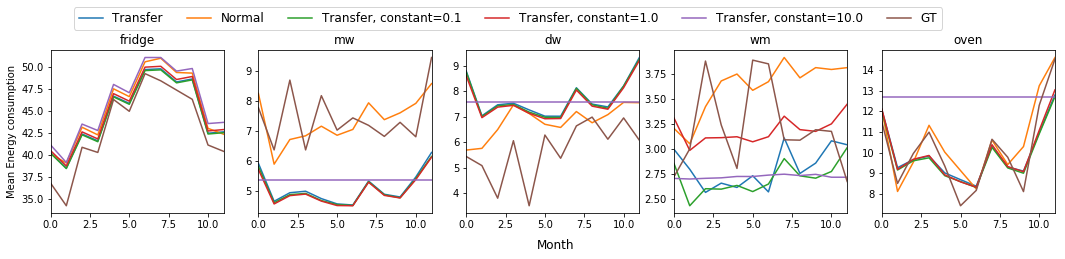

In [29]:
fig, ax = plt.subplots(ncols=5, figsize=(18, 3), sharex=True)
for i, appliance in enumerate(APPLIANCES_ORDER[2:]):
    pred_appliance= pd.DataFrame(HAT[:, APPLIANCES_ORDER[2:].index(appliance), :], index=df.index).mean()
    pred_appliance.plot(ax=ax[i], label='Transfer')
    pred_normal = pd.DataFrame(HAT_n[:, APPLIANCES_ORDER[2:].index(appliance), :], index=df.index).mean()
    pred_normal.plot(ax=ax[i], label='Normal')
    for constant in [0.1, 1, 10]:
        pred_appliance_season= pd.DataFrame(HAT_se[constant][:, APPLIANCES_ORDER[2:].index(appliance), :], index=df.index).mean()
        pred_appliance_season.plot(ax=ax[i], label='Transfer, constant=%0.1f' %constant)
    gt_appliance = df[['%s_%d' %(appliance, month) for month in range(1, 13)]].mean()
    gt_appliance.index =pred_appliance.index
    gt_appliance.plot(ax=ax[i], label='GT')
    ax[i].set_title(appliance)
ax[0].legend( bbox_to_anchor=(0.1,1.3), loc="upper left", ncol=6, fontsize=12)
ax[0].set_ylabel("Mean Energy consumption")
fig.text(0.5, -0.04, "Month", fontsize=12)

In [9]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor
tensor = get_tensor(df, dfc)
H, A, T = learn_HAT(case, tensor, 2, num_season, num_iter=4000, lr=0.1, dis=False, cost_function=cost)

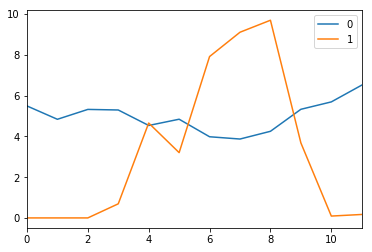

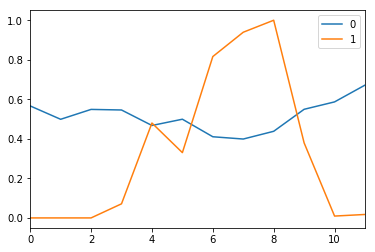

In [13]:
e = pd.DataFrame(T)
e.plot()
e = e.div(e.max().max())
e.plot()

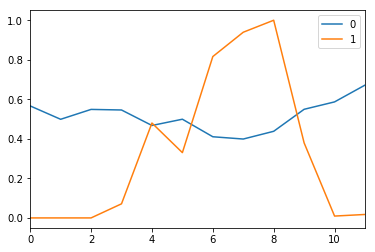

In [12]:
appliance_comb = APPLIANCES_ORDER
pd.DataFrame(out[num_season]["+".join(appliance_comb)]['T']).plot()